# Zoo Csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
animal = pd.read_csv(r"D:\Excelr Assignment\Data Scientist\13-KNN\Zoo.csv")
animal.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
# Data Processing

animal.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
duplicates = animal.animal_name.value_counts()
duplicates[duplicates>1]

frog    2
Name: animal_name, dtype: int64

In [6]:
frog = animal.loc[animal['animal_name']=='frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [7]:
animal['animal_name'][(animal.venomous ==1) & (animal.animal_name=='frog')] = 'frog2'

In [8]:
# Finding unique value of hair

color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow") for i in animal.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

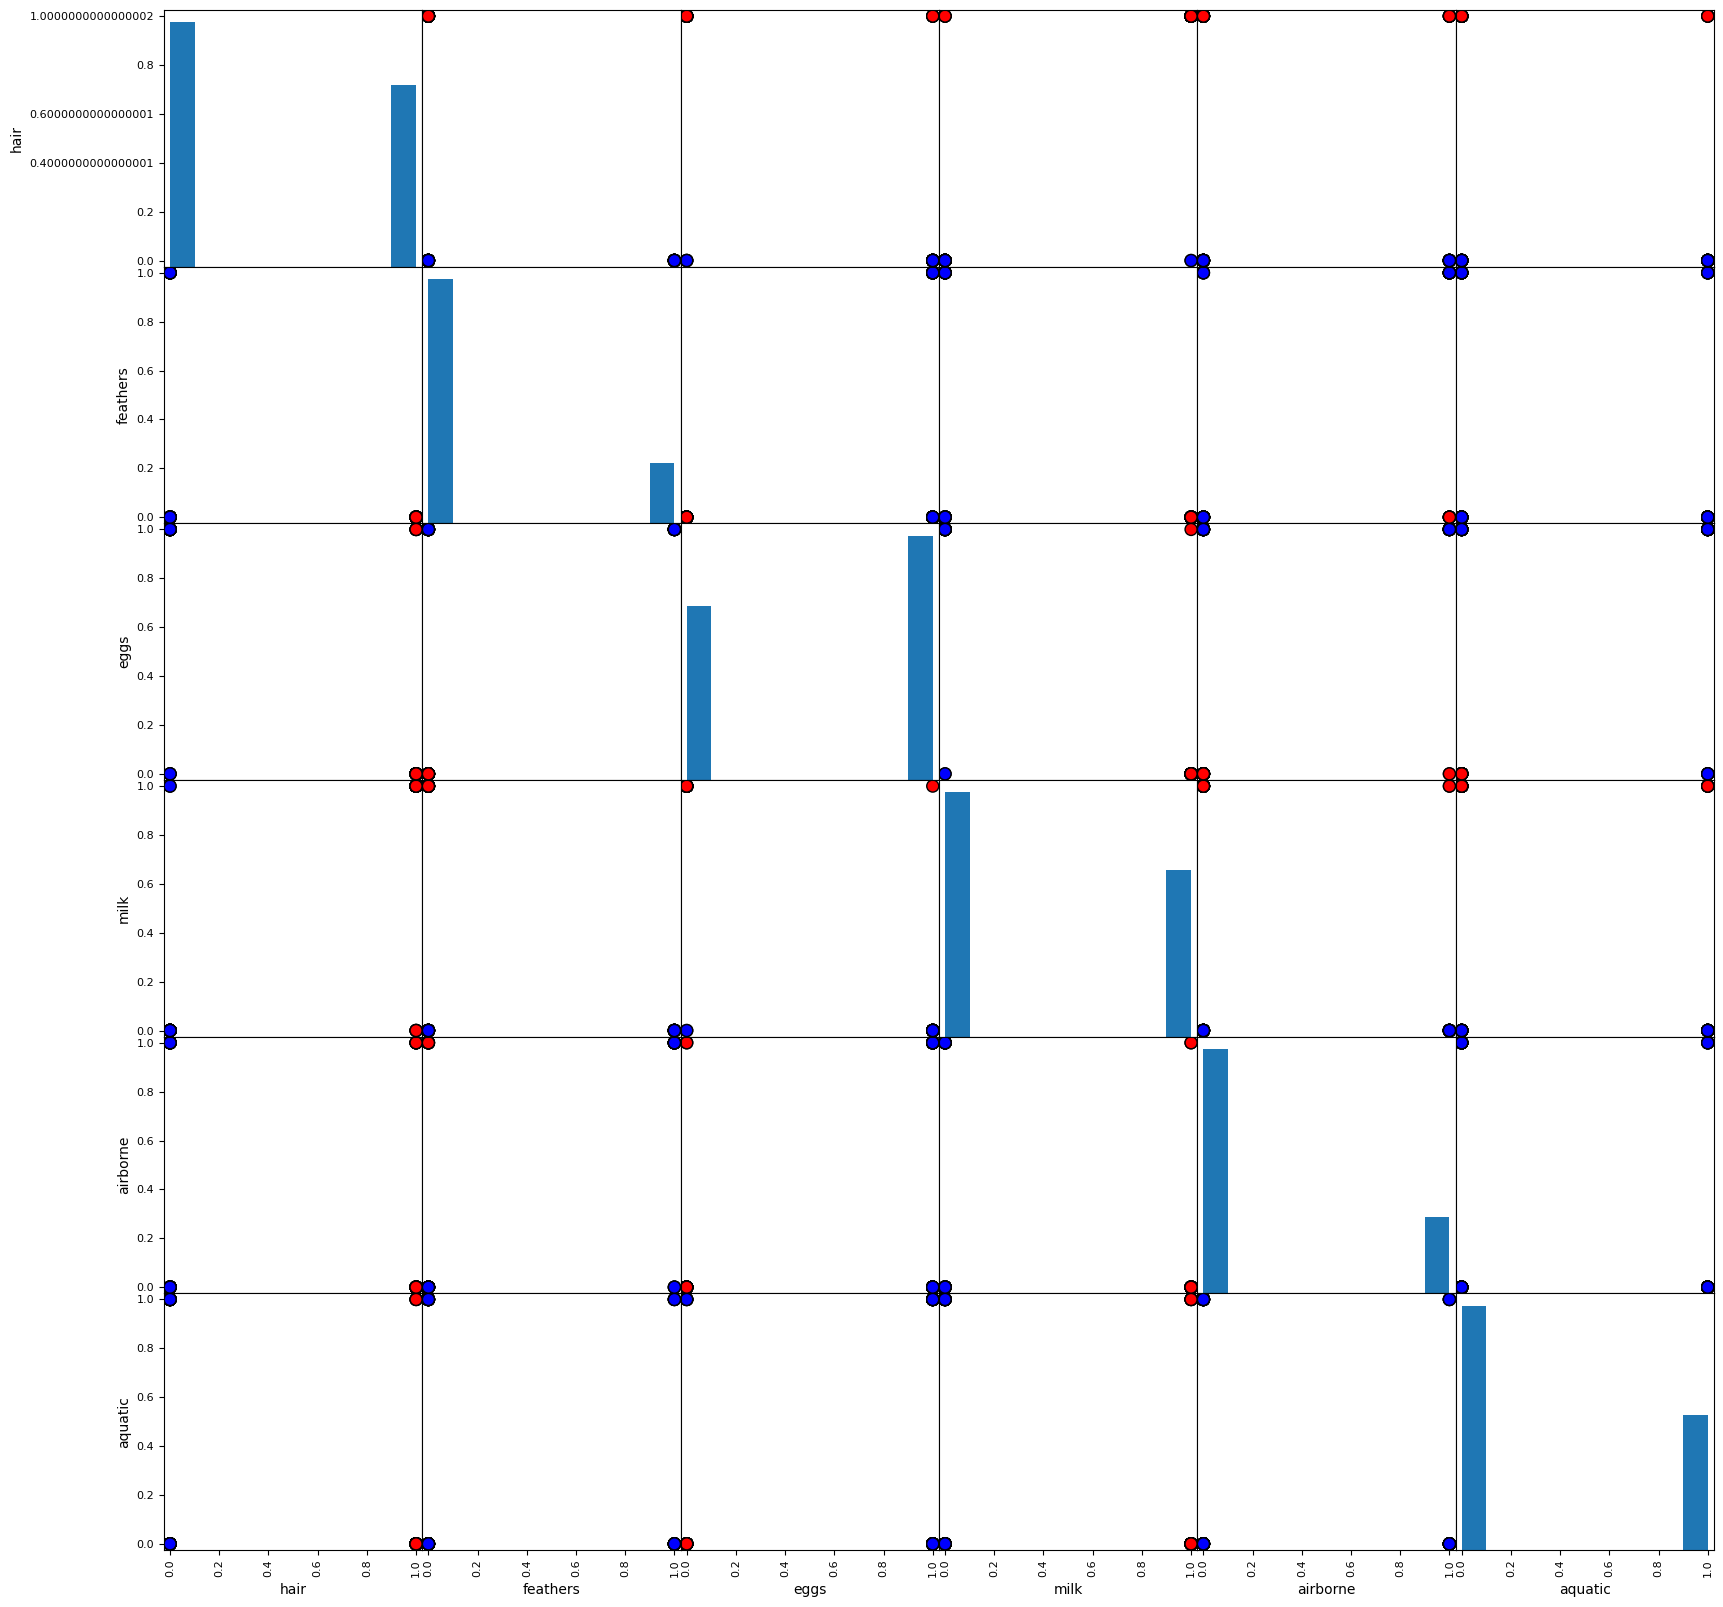

In [9]:
pd.plotting.scatter_matrix(animal.iloc[:,:7],c=color_list,figsize=[20,20],diagonal='hist',alpha=1,s=300,marker='.',
                          edgecolor="black")
plt.show()

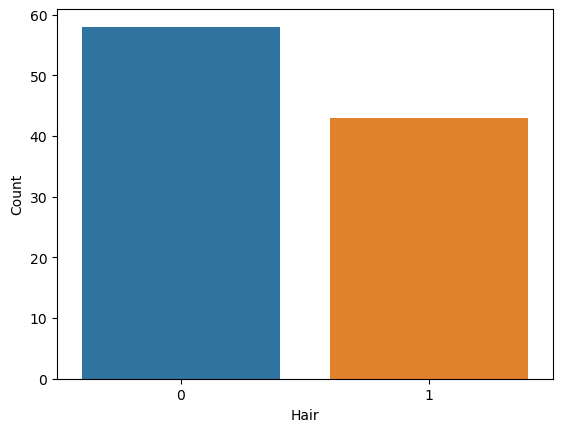

0    58
1    43
Name: hair, dtype: int64

In [10]:
sns.countplot(x="hair",data=animal)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
animal.loc[:,'hair'].value_counts()

# Class Csv

In [12]:
ani_class=pd.read_csv(r"D:\Excelr Assignment\Data Scientist\13-KNN\class.csv")
ani_class
df = pd.merge(animal,ani_class,how='left',left_on='type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [13]:
type_list=[i for i in df.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

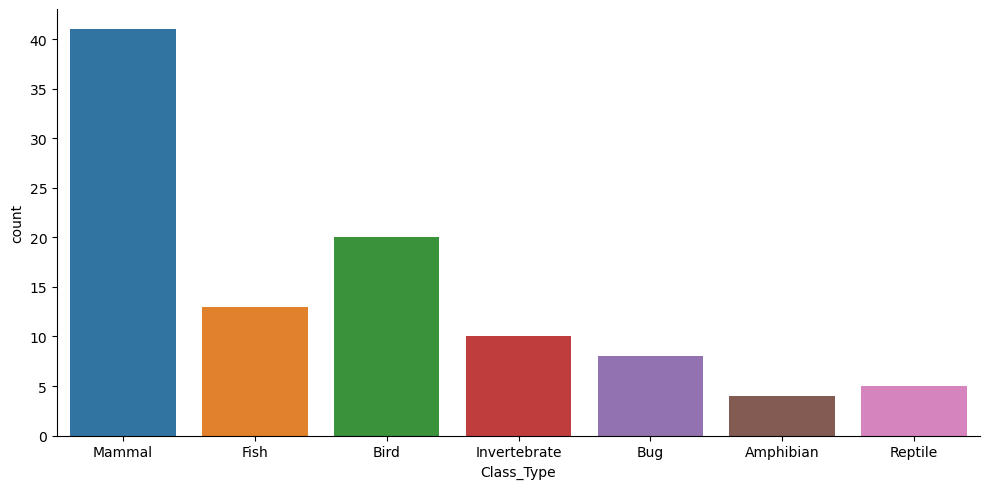

In [18]:
import seaborn as sns

sns.catplot(x='Class_Type', data=df, kind='count', height=5, aspect=2)

In [19]:
from sklearn.model_selection import train_test_split
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

# 3 Training & Testing the Data

In [20]:
# 1 K-Nearest Neighbors


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf=KNeighborsClassifier(n_neighbors=3)

#train model
clf.fit(X_train,y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)

scrs = []

# Accuracy Score

score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scrs.append(score)

In [22]:
# Cross validation as data is in small size

from sklearn.model_selection import cross_val_score

cv_scores = []

score_knn=cross_val_score(clf,X,y,cv=10)
print("K-nearest neighbors accuracy : %0.2f (+/- %.2f) with k value equals to 3" % (score_knn.mean(),score_knn.std()*2))

K-nearest neighbors accuracy : 0.95 (+/- 0.10) with k value equals to 3


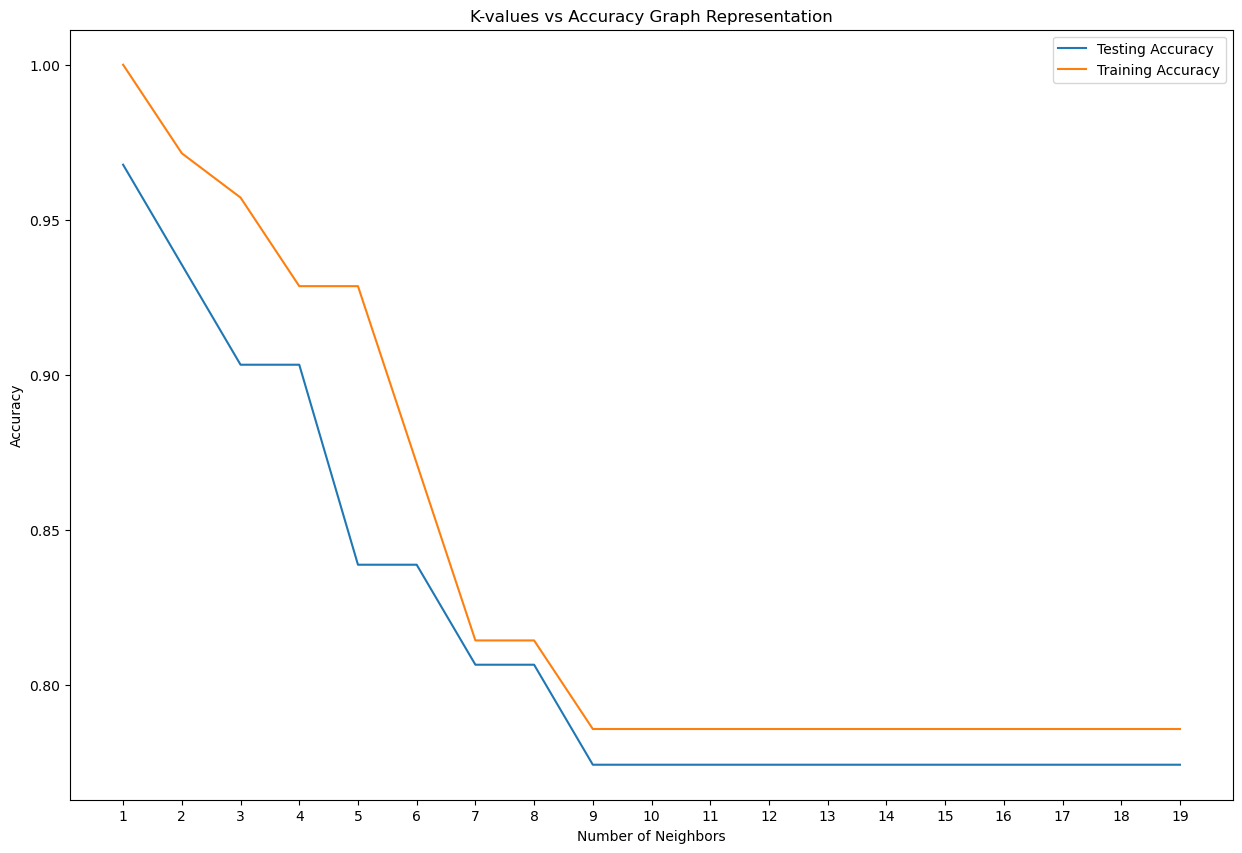

Best accuracy is 0.967741935483871 with k = 1


In [23]:
k_values = np.arange(1,20)
train_accuracy=[]
test_accuracy=[]

for i,k in enumerate(k_values):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
    
plt.figure(figsize=[15,10])
plt.plot(k_values,test_accuracy,label='Testing Accuracy')
plt.plot(k_values,train_accuracy,label='Training Accuracy')
plt.legend()
plt.title('K-values vs Accuracy Graph Representation')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print('Best accuracy is {} with k = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
cv_scores.append(np.max(test_accuracy))

In [24]:
# 2. Support Vector Machines (SVM)

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',C=0.2,random_state=0)

svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

score=accuracy_score(y_pred_svm,y_test)
scrs.append(score)

In [26]:
score_svm=cross_val_score(svm,X,y,cv=10)
print("Support Vector Machine Accuracy : %0.2f (+/- %0.2f)"%(score_svm.mean(),score_svm.std()*2))

cv_score=score_svm.mean()
cv_scores.append(cv_score)

Support Vector Machine Accuracy : 0.96 (+/- 0.10)


In [27]:
# 3 Decision Tree

In [2]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz

In [31]:
from sklearn.model_selection import cross_val_score
score_tree=cross_val_score(cf,X,y,cv=10)
score_tree

array([1. , 1. , 1. , 1. , 0.9, 0.9, 0.8, 1. , 1. , 1. ])

In [32]:
print("Decision Tree Accuracy : %0.2f (+/- %0.2f)" % (score_tree.mean(),score_tree.std()*2))
cv_score=score_tree.mean()
cv_scores.append(cv_score)

Decision Tree Accuracy : 0.96 (+/- 0.13)


In [33]:
# 4 Random Forest Classifier 

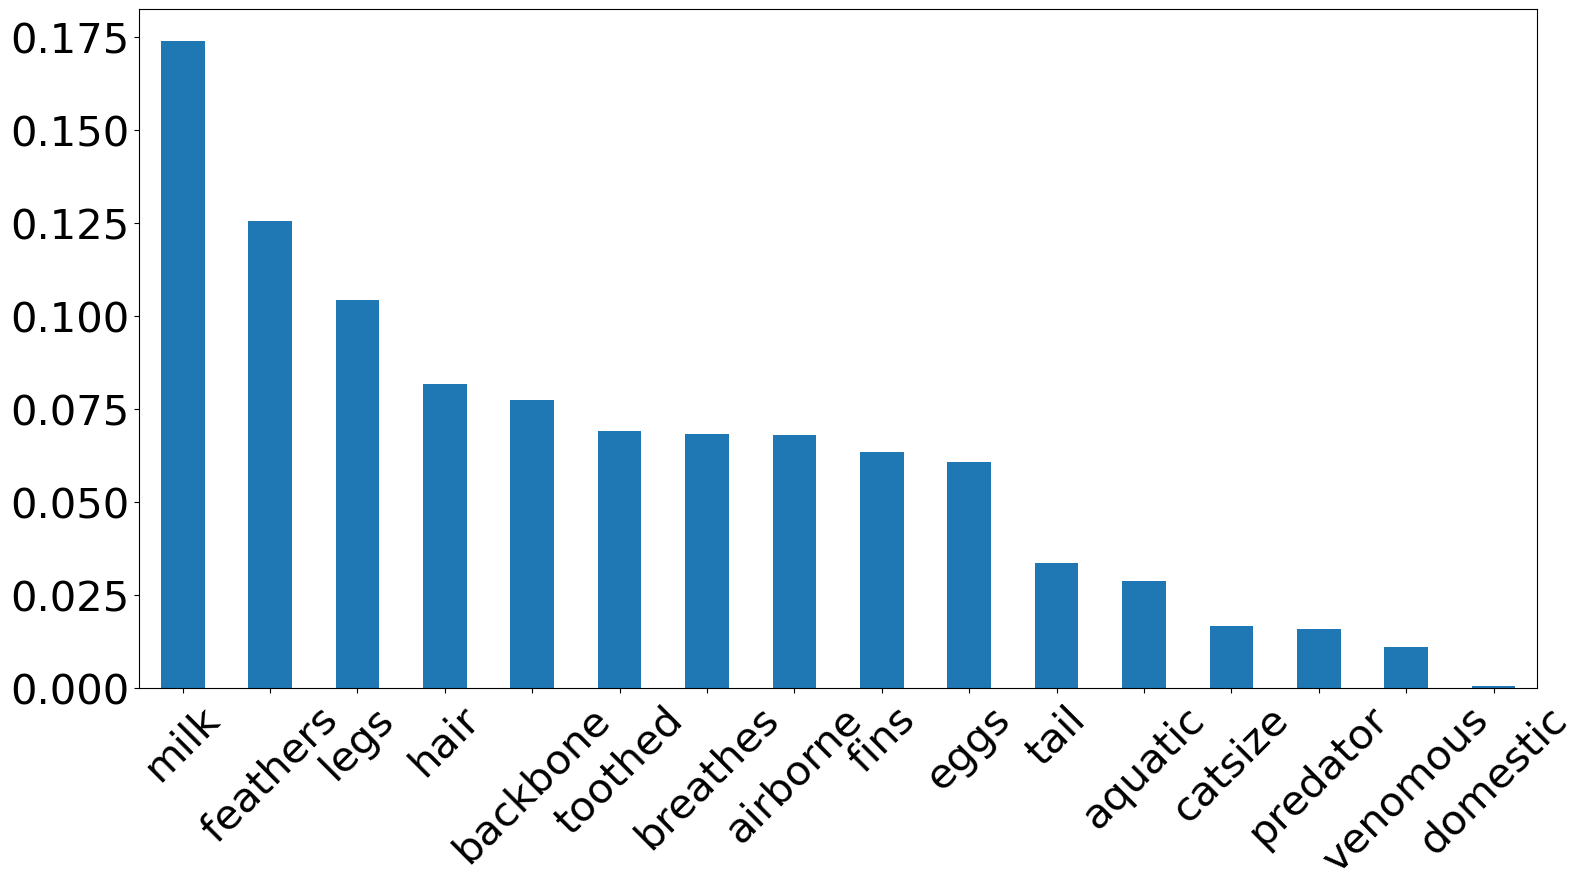

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0,n_estimators=25,n_jobs=2)
clf.fit(X_train,y_train)
y_pred_RandomForestClassifier = clf.predict(X_test)

score=accuracy_score(y_pred_RandomForestClassifier,y_test)
scrs.append(score)

global importances

importances = []
importances = clf.feature_importances_

f_importances = pd.Series(importances,X.columns)
f_importances.sort_values(ascending=False,inplace=True)
f_importances.plot(x='Features',y='Importance',kind='bar',figsize=(16,9),rot=45,fontsize=30)

plt.tight_layout()
plt.show()

In [35]:
score_forest = cross_val_score(clf,X,y,cv=10)
score_forest
print("Random Forest Accuracy : %0.2f(+/- %0.2f)"% (score_forest.mean(),score_forest.std()*2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

Random Forest Accuracy : 0.97(+/- 0.09)


In [36]:
# Perceptron Model

from sklearn.linear_model import Perceptron

clf = Perceptron(eta0=0.1,random_state=0)
clf.fit(X_train,y_train)
y_pred_Perceptron = clf.predict(X_test)

score = accuracy_score(y_pred_Perceptron,y_test)
scrs.append(score)

In [37]:
# Cross Validation score
score_perceptron = cross_val_score(clf,X,y,cv=10)
score_perceptron
print("Perceptron Accuracy : %0.2f(+/- %0.2f)"%(score_perceptron.mean(),score_perceptron.std()*2))

cv_score=score_perceptron.mean()
cv_scores.append(cv_score)

Perceptron Accuracy : 0.93(+/- 0.09)


# ComparisionOf All 5 Models

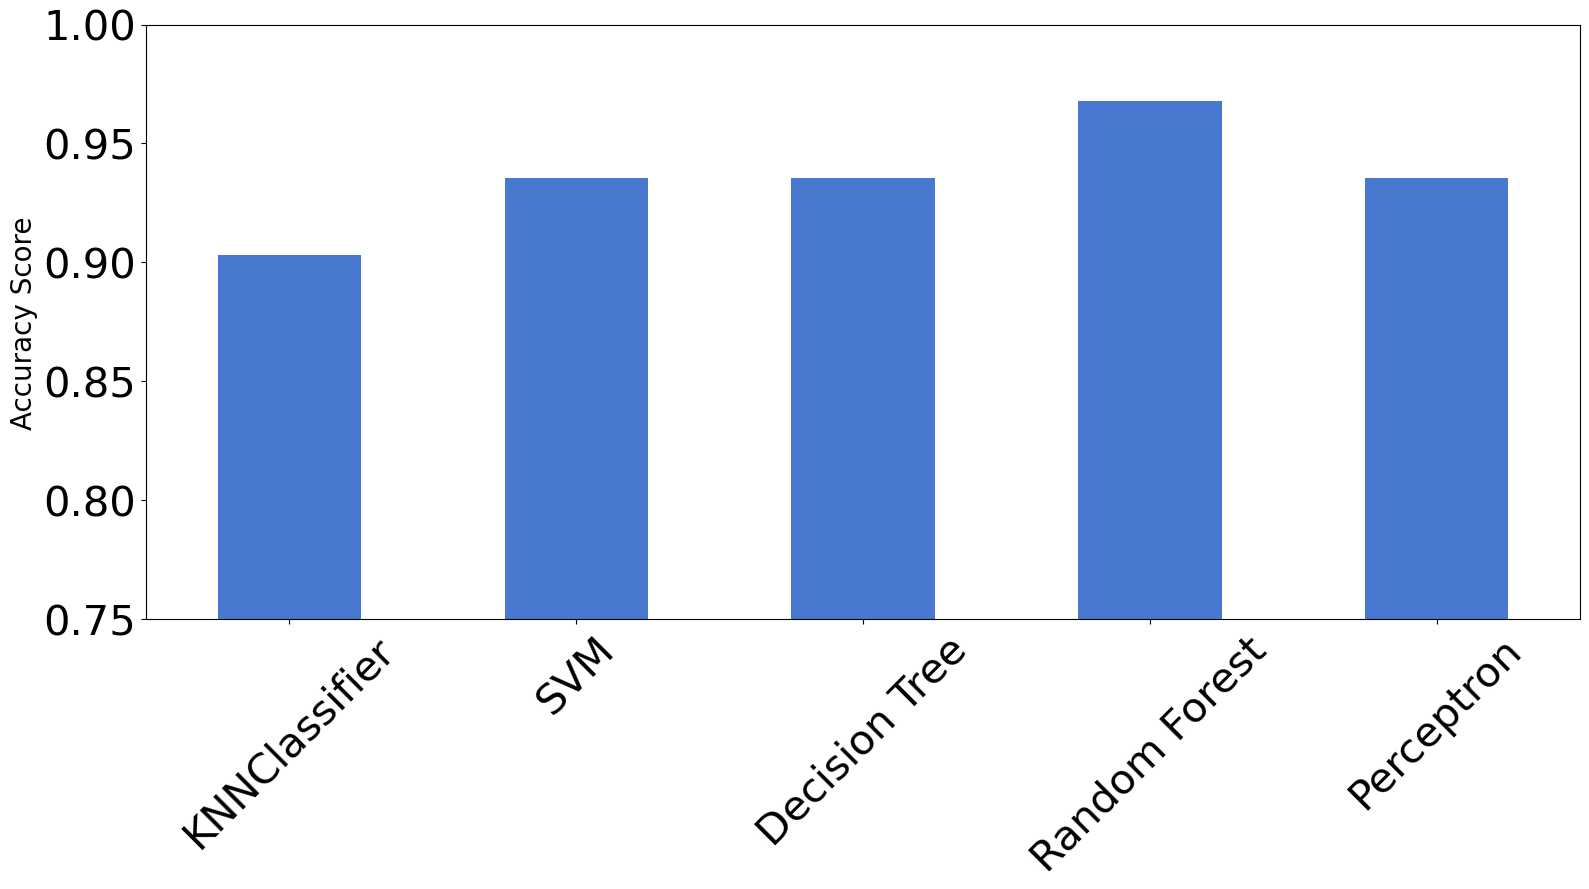

In [38]:
Acc_scores =pd.Series(scrs, ['KNNClassifier','SVM','Decision Tree','Random Forest','Perceptron'])

current_palette = sns.color_palette("muted",n_colors=5)
cmap=ListedColormap(sns.color_palette(current_palette).as_hex())

Acc_scores.plot(x='Classifiers',y='Accuracy scores',kind='bar',figsize=(16,9),rot=45,fontsize=30,colormap=cmap)

plt.xlabel('',fontsize=20)
plt.ylabel('Accuracy Score',fontsize=20)
plt.ylim([0.75,1])
plt.tight_layout()
plt.show()